In [8]:
from matplotlib import pyplot as plt
import tensorflow as tf
#from tensorflow import keras
#Используем костыль для исправления IntelliSense для keras по гайду:
#https://stackoverflow.com/questions/71000250/import-tensorflow-keras-could-not-be-resolved-after-upgrading-to-tensorflow-2
import keras.api._v2.keras as keras
from keras import layers
from keras import losses
#from keras.datasets import CIFAR100
import numpy as np
import tensorflow_datasets as tfds
from tensorflow.python.ops.numpy_ops import np_config
np_config.enable_numpy_behavior()

ClassLabel(shape=(), dtype=tf.int64, num_classes=196)


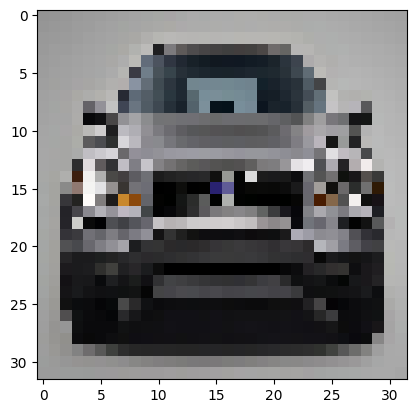

In [110]:
num_classes=196
(ds_train, ds_test), ds_info = tfds.load(
    'cars196',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)
print(ds_info.features['label'])
def prepare_img(image, label):
    """Normalizes images: `uint8` -> `float32`."""
    #output = tf.image.crop_and_resize(image, boxes, box_indices, CROP_SIZE)
    
    image2=tf.image.central_crop(image,1)
    image3=tf.image.resize(image2,[32,32])
    #image4=tf.image.no
    #image4=tf.image.rgb_to_grayscale(image3)
    #label = keras.utils.to_categorical(label, num_classes)
    return tf.cast(image3, tf.float32) / 255., label

ds_train = ds_train.map(prepare_img, num_parallel_calls=tf.data.AUTOTUNE)
ds_test = ds_test.map(prepare_img, num_parallel_calls=tf.data.AUTOTUNE)

#ds_train = ds_train.cache("ds_train")
#ds_test = ds_train.cache("ds_test")

#ds_train = ds_train.shuffle(ds_info.splits['train'].num_examples)
ds_train = ds_train.batch(1000)
ds_test=ds_test.batch(1000)
for image,label in ds_train:
    #print(label)
    #print()
    #print(image)
    plt.imshow(image[0].reshape((32,32,3)), interpolation='nearest')
    plt.show()
    break
#ds_train = ds_train.prefetch(tf.data.AUTOTUNE)

#print(ds_train.)
#dataset = tf.data.Dataset.from_generator(get_image, output_shapes=(128, 128), output_types=(tf.float32))
#print(prepare_img())

#tf.image.crop_and_resize
#tf.image.

In [111]:
#num_classes=100
#input_shape = (32, 32, 1)
input_shape = (32, 32, 3)
#x_train = np.expand_dims(x_train, -1)
#x_test = np.expand_dims(x_test, -1)

#y_train = keras.utils.to_categorical(y_train, num_classes)
#y_test = keras.utils.to_categorical(y_test, num_classes)


#print("Train X=%s, y=%s"%(x_train.shape,y_train.shape))
#print("Train Letters X=%s, y=%s"%(x_train_l.shape,y_train_l.shape))
#print("Test X=%s, y=%s"%(x_test1.shape,y_test.shape))



#print("Train X=%s, y=%s"%(x_train.shape,y_train.shape))
#print("Test X=%s, y=%s"%(x_test.shape,y_test.shape))
#print(x_test[0].shape)

In [112]:
model=keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.BatchNormalization(),
        
        layers.Conv2D(32, kernel_size=(5, 5), activation="relu",use_bias=True),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.BatchNormalization(),
        #layers.Dropout(0.2),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu",use_bias=True),
        layers.BatchNormalization(),
        #layers.Dropout(0.2),
        #layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu",use_bias=True),
        layers.BatchNormalization(),
        #layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.BatchNormalization(),
        #layers.Dropout(0.4),
        #layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]#52 Буквы, 10 цифрф
 )
print(model.output_shape)
print(str(model.summary()))

(None, 196)
Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_60 (Bat  (None, 32, 32, 3)        12        
 chNormalization)                                                
                                                                 
 conv2d_42 (Conv2D)          (None, 28, 28, 32)        2432      
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 batch_normalization_61 (Bat  (None, 14, 14, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_43 (Conv2D)          (None, 12, 12, 32)        9248      
                                          

In [113]:
model.compile(
    loss=losses.CategoricalCrossentropy(),
    optimizer=tf.optimizers.Adadelta(),
    metrics=['accuracy']
)

In [114]:
#model.fit(x_train,y_train,batch_size=1,epochs=5,shuffle=True)

In [115]:
x_test=None
y_test=None
for x_test2, y_test2 in ds_test:
    #data=list(ds_test.take(1))
    x_test=x_test2
    y_test=y_test2
    y_test= keras.utils.to_categorical(np.array(y_test), num_classes)
    print(x_test)
    print(y_test)
    break

tf.Tensor(
[[[[5.90196073e-01 5.76470613e-01 5.25490224e-01]
   [6.91176474e-01 6.27451003e-01 5.02451003e-01]
   [7.51470566e-01 7.27941155e-01 6.55882359e-01]
   ...
   [8.09803903e-01 8.10784340e-01 8.00000012e-01]
   [6.90196097e-01 6.46078408e-01 5.11764705e-01]
   [6.52941167e-01 6.13725483e-01 4.76470590e-01]]

  [[5.93137264e-01 5.57843149e-01 4.40196067e-01]
   [7.11764693e-01 6.62745118e-01 5.31372547e-01]
   [7.39215672e-01 6.91176474e-01 5.52941203e-01]
   ...
   [6.83333337e-01 6.39705896e-01 5.03921568e-01]
   [6.37745082e-01 5.80392182e-01 4.08823520e-01]
   [6.94607854e-01 6.52450979e-01 5.05392134e-01]]

  [[5.83333313e-01 5.43137252e-01 4.33333337e-01]
   [6.39705896e-01 5.80882370e-01 4.53431368e-01]
   [6.98039234e-01 6.44117653e-01 5.00980377e-01]
   ...
   [7.17156887e-01 6.77941203e-01 5.40686250e-01]
   [6.57843113e-01 6.20588243e-01 4.73529398e-01]
   [6.76470578e-01 6.31372571e-01 4.94117647e-01]]

  ...

  [[7.45098069e-02 7.05882385e-02 5.49019612e-02]
   [2

In [116]:

#print("x_train=",x_train.shape,"y_train",y_train.shape)
model.save("saved_model_CNN/learn_epoch_start.h5")
for i in range(1,20):
    print("Epoch "+str(i))
    for x_train,y_train in ds_train:
        y_train = keras.utils.to_categorical(y_train, num_classes)
        
        model.save('saved_model_CNN/learn_epoch_start='+str(i)+".h5")
        
       # (x_test,y_test)=ds_test.take(100)
        model.fit(x_train,y_train,batch_size=1000,epochs=1,shuffle=True,validation_data=(x_test,y_test))
        #results=model.evaluate(x_test,y_test,batch_size=50,verbose=2)
        #print(str(results))
        #,validation_data=(x_test,y_test)
    model.save('saved_model_CNN/learn_epoch_end='+str(i)+".h5")
#results=model.evaluate(x_test,y_test,batch_size=50,verbose=2)
#print(str(results))
model.save("saved_model_CNN/learn_done.h5")

Epoch 1
1/1 [==============================] - 1s 1s/step - loss: 6.3076 - accuracy: 0.0000e+00 - val_loss: 5.2796 - val_accuracy: 0.0090
Epoch 2
1/1 [==============================] - 0s 354ms/step - loss: 6.2683 - accuracy: 0.0069 - val_loss: 5.2790 - val_accuracy: 0.0070
Epoch 3
1/1 [==============================] - 0s 352ms/step - loss: 6.2290 - accuracy: 0.0069 - val_loss: 5.2807 - val_accuracy: 0.0080
Epoch 4
1/1 [==============================] - 0s 358ms/step - loss: 6.4116 - accuracy: 0.0069 - val_loss: 5.2841 - val_accuracy: 0.0080
Epoch 5
1/1 [==============================] - 0s 411ms/step - loss: 6.2642 - accuracy: 0.0069 - val_loss: 5.2885 - val_accuracy: 0.0060
Epoch 6
1/1 [==============================] - 0s 370ms/step - loss: 6.3029 - accuracy: 0.0069 - val_loss: 5.2943 - val_accuracy: 0.0060
Epoch 7
1/1 [==============================] - 0s 368ms/step - loss: 6.3324 - accuracy: 0.0069 - val_loss: 5.3015 - val_accuracy: 0.0060
Epoch 8
1/1 [===========================

RuntimeError: Can't decrement id ref count (unable to extend file properly)

In [66]:
#Без dropout было явное переобучение train 90 пртив test 45
#print("x_train=",x_train.shape,"y_train",y_train.shape)
model.save("saved_model_CNN2/CIFAR100_learn_epoch_start.h5")
for i in range(1,10):
    print("Epoch "+str(i))
    model.save('saved_model_CNN2/CIFAR100_learn_epoch_start='+str(i)+".h5")
    model.fit(x_train,y_train,batch_size=25,epochs=1,shuffle=True,validation_data=(x_test,y_test))
    #,validation_data=(x_test,y_test)
    
    
    model.save('saved_model_CNN2/CIFAR100_learn_epoch_end='+str(i)+".h5")
results=model.evaluate(x_test,y_test,batch_size=50,verbose=2)
print(str(results))
model.save("saved_model_CNN2/CIFAR100_learn_done.h5")

Epoch 1


NameError: name 'x_test' is not defined

In [6]:
model.load_weights("saved_model_CNN2/CIFAR100_learn_epoch_end=8.h5")
model.compile(
    loss=losses.CategoricalCrossentropy(),
    optimizer=tf.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

In [7]:
#Без dropout было явное переобучение train 90 пртив test 45
#print("x_train=",x_train.shape,"y_train",y_train.shape)
model.save("saved_model_CNN3/CIFAR100_learn_epoch_start.h5")
for i in range(1,3):
    print("Epoch "+str(i))
    model.save('saved_model_CNN3/CIFAR100_learn_epoch_start='+str(i)+".h5")
    model.fit(x_train,y_train,batch_size=25,epochs=1,shuffle=True,validation_data=(x_test,y_test))
    #,validation_data=(x_test,y_test)
    
    
    model.save('saved_model_CNN3/CIFAR100_learn_epoch_end='+str(i)+".h5")
results=model.evaluate(x_test,y_test,batch_size=50,verbose=2)
print(str(results))
model.save("saved_model_CNN3/CIFAR100_learn_done.h5")

Epoch 1
 614/2000 [========>.....................] - ETA: 16s - loss: 3.1998 - accuracy: 0.2230

KeyboardInterrupt: 

In [ ]:
#model.fit(x_train,y_train,batch_size=32,epochs=5)

In [8]:
#model.load_weights("saved_model3/ECIFAR100_learn_epoch_start.h5")

313/313 - 1s - loss: 0.0398 - accuracy: 0.9875 - 1s/epoch - 3ms/step
[0.039796166121959686, 0.987500011920929]
8440
(28, 28, 3)
(28, 28, 1)
1/1 [==============================] - 0s 24ms/step
9


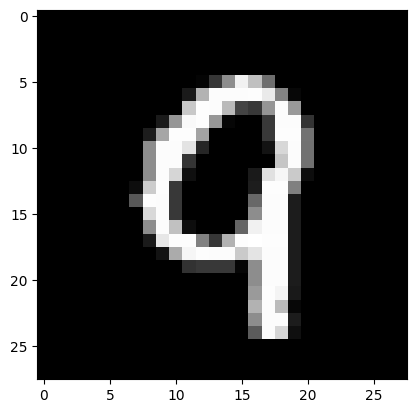

In [12]:
results=model.evaluate(x_test,y_test,batch_size=32,verbose=2)
print(str(results))
value=np.random.randint(0,10000)
print(value)
for id in range(len(y_train)):
    #print(labels[id])
    #break
    #22 - M big
    if(y_train.argmax()==7):
        value=id
        break
        


#print(x_train[value].shape)

single=x_train[value]
image=np.zeros((28,28,3))
print(image.shape)

for y in range(0,image.shape[0]):
    for x in range(0,image.shape[1]):
        for c in range(0,image.shape[2]):
            image[y,x,c]=single[y][x]



print(single.shape)
#print(single)

singleReady=np.zeros((1,28,28))

for y in range(0,image.shape[0]):
    for x in range(0,image.shape[1]):
            singleReady[0][y][x]=single[y][x]

print(model.predict(singleReady,batch_size=1).argmax())

plt.imshow(image)
plt.show()

In [13]:
model.save('saved_model_CNN/CIFAR100_byclass_done.h5')

In [14]:
#results=model.evaluate(x_test,y_test,batch_size=32,verbose=2)
#print(str(results))
#value=np.random.randint(0,10000)

id=22
for v in y_train:
    if(v.argmax()==id):
        print(id)
        ShowImage(v)
        break
        #id+=1
currentIteration=0
'''for v in y_train:
    if(v==id):
        print(id,v)
        ShowImage(v)
        currentIteration+=1
        id+=1    
    if(currentIteration==10):
        break'''


def ShowImage(value:int):
    print(x_train[value].shape)

    single=x_train[value]
    image=np.zeros((28,28,3))
    print(image.shape)

    for y in range(0,image.shape[0]):
        for x in range(0,image.shape[1]):
            for c in range(0,image.shape[2]):
                image[y,x,c]=single[y*28+x]



    #print(single.shape)
    #print(single)

    #singleReady=np.zeros((1,28*28))

    #for y in range(0,image.shape[0]):
    #    for x in range(0,image.shape[1]):
    #            singleReady[0][y*28+x]=single[y*28+x]

    #print(model.predict(singleReady,batch_size=1).argmax())

    plt.imshow(image)
    plt.show()

In [17]:
from PIL import Image
IMG = np.asarray(Image.open('E:/JupyterLab/Tensorflow_FKI_fall_2022/2022.10.07/Segmented/9.png'))

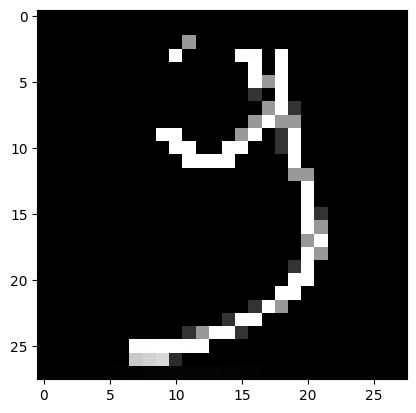

(28, 28, 3)
(1, 28, 28)


In [30]:
plt.imshow(IMG)
plt.show()
print(IMG.shape)

IMG_2=np.zeros((1,28,28),dtype="float32")

for x in range(28):
    for y in range(28):
        IMG_2[0][x][y]=IMG[x][y][0]/255.
print(IMG_2.shape)

In [32]:
print(model.predict(IMG_2,batch_size=1).argmax())

1/1 [==============================] - 0s 26ms/step
3
